In [1]:
import copy
import time
import random

k = 3
dimension = 3

threshold = 1e-4


In [2]:
def createData(dataCnt):
    dataList = []
    cnt = [0,0,0]
    for i in range(dataCnt):
        s = random.randint(1,20)
        temp = []
        if s<7:
            temp.append(random.randint(10,50))
            temp.append(random.randint(10,60))
            temp.append(random.randint(20,30))
            cnt[0]+=1
        elif s<16:
            temp.append(random.randint(10,110))
            temp.append(random.randint(100,180))
            temp.append(random.randint(90,130))
            cnt[1]+=1
        else:
            temp.append(random.randint(30,80))
            temp.append(random.randint(10,60))
            temp.append(random.randint(150,190))
            cnt[2]+=1
        temp = [float(x) for x in temp]
        dataList.append(temp)
    fo = open("foo.txt", "w")
    for i in dataList:
        s = str(i[0]) + " " + str(i[1]) + " " + str(i[2])
        fo.write(s + "\n")
    fo.close()
    print "Origin:" , cnt
    return dataList

def updateCluster(u,centerT):
    costMin = 999999
    pos     = -1
    for i in range(3):
        cost = sum([(u[0][j]-centerT[i][j])**2 for j in range(3)])
        if cost <costMin:
            costMin = cost
            pos = i
    return [u[0],pos+1,costMin]

In [3]:
dataOri = createData(200000)

timeC = time.time()
data = [ [x,0,0] for x in dataOri ]

centers = [[17.0, 36.0, 30.0], [19.0, 33.0, 24.0], [38.0, 48.0, 29.0]]

data = [updateCluster(x,centers) for x in data] 
costTotal = sum([x[-1] for x in data])
print costTotal

iterCount = 0

while True:
    iterCount += 1
    centerN = copy.deepcopy(centers)
    for i in range(k):
        clusterSize = 0
        cluster = [0 for j in range(dimension)]
        for x in data:
            if x[1]==i+1:
                cluster = [cluster[y]+x[0][y] for y in range(dimension)]
                clusterSize += 1
        print clusterSize
        centerN[i] = [cluster[h]/clusterSize for h in range(dimension)]
    print "N",centerN
    data = [ updateCluster(x,centerN) for x in data ]
    costN = sum([x[-1] for x in data])
 
    if(costN < (1-threshold)*costTotal):
        costTotal = costN
        centers = copy.deepcopy(centerN)
    else:
        break

print iterCount, costTotal

timeD = time.time()

Origin: [60096, 89932, 49972]
2591442667.0
17870
26868
155262
N [[26.94152210408506, 34.301678791270284, 100.67728035814214], [26.537181777579278, 22.888752419234777, 24.544476700908145], [56.35686130540635, 97.92656928288957, 112.320780358362]]
37958
60096
101946
N [[52.376099899889354, 29.474998682754624, 169.39414616154698], [29.99039869542066, 35.04873868477103, 24.998818556975507], [60.36656661369745, 129.5501540030997, 117.37116708845859]]
49972
60096
89932
N [[54.965100456255506, 34.98969422876811, 170.0390618746498], [29.99039869542066, 35.04873868477103, 24.998818556975507], [59.99539652181648, 139.854857003069, 110.06306987501668]]
49972
60096
89932
N [[54.965100456255506, 34.98969422876811, 170.0390618746498], [29.99039869542066, 35.04873868477103, 24.998818556975507], [59.99539652181648, 139.854857003069, 110.06306987501668]]


KeyboardInterrupt: 

In [ ]:

timeA = time.time()
data = sc.parallelize([x,0,0] for x in dataOri).cache()
centers = [[17.0, 36.0, 30.0], [19.0, 33.0, 24.0], [38.0, 48.0, 29.0]]

data = data.map(lambda x: updateCluster(x,centers))
costTotal = data.map(lambda x: x[-1]).reduce(lambda x,y: x+y)
print costTotal

iterCount = 0

while True:
    iterCount += 1
    centerN = copy.deepcopy(centers)
    for i in range(k):
        cluster = data.filter(lambda x:x[1]==i+1).map(lambda x:x[0]).reduce(lambda x,y:[x[j]+y[j] for j in range(dimension)])
        clusterSize = data.filter(lambda x:x[1]==i+1).count()
        print clusterSize
        centerN[i] = [cluster[h]/clusterSize for h in range(dimension)]
    print "N",centerN
    data = data.map(lambda x: updateCluster(x,centerN))
    print data.count()
    costN = data.map(lambda x: x[-1]).reduce(lambda x,y: x+y)
 
    if(costN < (1-threshold)*costTotal):
        costTotal = costN
        centers = copy.deepcopy(centerN)
    else:
        break

print iterCount, costTotal

timeB = time.time()


In [4]:
import random
import time

def updateCluster(u,centerT):
    costMin = 999999
    pos     = -1
    for i in range(3):
        cost = sum([(u[j]-centerT[i][j])**2 for j in range(3)])
        if cost <costMin:
            costMin = cost
            pos = i
    return [u,pos+1,costMin]

timeE = time.time()
data = sc.textFile("foo.txt").map(lambda line: [float(i) for i in line.split(" ")]).cache()
centers = data.takeSample(False,k,random.randint(1,1000))

costTotal = data.map(lambda x: updateCluster(x,centers)[-1]).reduce(lambda x,y:x+y)
print costTotal

iterCount = 0

while True:
    iterCount += 1
    centerN = copy.deepcopy(centers)
    for i in range(k):
        cluster = data.map(lambda x: updateCluster(x,centers)).filter(lambda x:x[1]==i+1).map(lambda x:x[0]).reduce(lambda x,y:[x[j]+y[j] for j in range(dimension)])
        clusterSize = data.map(lambda x: updateCluster(x,centers)).filter(lambda x:x[1]==i+1).count()
        print clusterSize
        centerN[i] = [cluster[h]/clusterSize for h in range(dimension)]
    print "N",centerN
    costN = data.map(lambda x: updateCluster(x,centerN)).map(lambda x: x[-1]).reduce(lambda x,y: x+y)
 
    if(costN < (1-threshold)*costTotal):
        costTotal = costN
        print iterCount,costTotal
        centers = copy.deepcopy(centerN)
    else:
        break

print iterCount, costTotal

timeF = time.time()

print timeF-timeE

724355439.0
60096
85070
54834
N [[29.99039869542066, 35.04873868477103, 24.998818556975507], [70.09254731397672, 78.06364170682967, 142.8867873515928], [39.74630703578072, 140.15132946711893, 113.79809971915235]]
1 356667209.41
60096
59389
80515
N [[29.99039869542066, 35.04873868477103, 24.998818556975507], [60.48879422115206, 46.81836703766691, 161.251494384482], [56.50938334471837, 143.39484568092902, 109.53013724150779]]
2 204013674.019
60096
49972
89932
N [[29.99039869542066, 35.04873868477103, 24.998818556975507], [54.965100456255506, 34.98969422876811, 170.0390618746498], [59.99539652181648, 139.854857003069, 110.06306987501668]]
3 189392700.01
60096
49972
89932
N [[29.99039869542066, 35.04873868477103, 24.998818556975507], [54.965100456255506, 34.98969422876811, 170.0390618746498], [59.99539652181648, 139.854857003069, 110.06306987501668]]
4 189392700.01
43.5764110088


In [ ]:
print timeB - timeA
print timeD - timeC
print timeF - timeE

In [ ]:
# using  MLlib
from pyspark.ml.clustering import KMeans,KMeansModel
from pyspark.ml.linalg import Vectors
import time

kmeans    = KMeans(k=3,seed=1)
newData   = sc.textFile("foo.txt").map(lambda line: [float(i) for i in line.split(" ")]).collect()

# into vector
dataV = []
for i in newData:
    dataV.append((Vectors.dense(i),))

timeA = time.time()
df = spark.createDataFrame(dataV,["features"])
model  = kmeans.fit(df)
centersNew = model.clusterCenters()
timeB = time.time()
print (centersNew)
print(timeB-timeA)

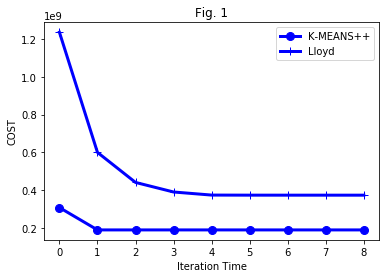

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

y1=[307778979.0, 189392842.20799997, 189392842.20799997, 189392842.20799997, 189392842.20799997, 189392842.20799997, 189392842.20799997, 189392842.20799997, 189392842.20799997]
x1=[0,1,2,3,4,5,6,7,8]
y2=[1236056202.6, 599905357.3055747, 440851699.4169698, 390165168.7364962, 373856753.3130032, 373453694.2414194, 373385656.04753405, 373371303.4619545, 373371303.4619545]
x2=[0,1,2,3,4,5,6,7,8]
plt.plot(x1,y1,label='K-MEANS++',linewidth=3,color='b',marker='o',markerfacecolor='b',markersize=8)
plt.plot(x2,y2,label='Lloyd',linewidth=3,color='b',marker='+',markerfacecolor='b',markersize=8)
plt.xlabel('Iteration Time')
plt.ylabel('COST')
plt.title('Fig. 1')
plt.legend()
plt.show() 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

y1=[307778979.0, 189392842.20799997, 189392842.20799997, 189392842.20799997, 189392842.20799997, 189392842.20799997, 189392842.20799997, 189392842.20799997, 189392842.20799997]
x1=[0,1,2,3,4,5,6,7,8]
y2=[1236056202.6, 599905357.3055747, 440851699.4169698, 390165168.7364962, 373856753.3130032, 373453694.2414194, 373385656.04753405, 373371303.4619545, 373371303.4619545]
x2=[0,1,2,3,4,5,6,7,8]
plt.plot(x1,y1,label='K-MEANS++',linewidth=3,color='b',marker='o',markerfacecolor='b',markersize=8)
plt.plot(x2,y2,label='Lloyd',linewidth=3,color='b',marker='+',markerfacecolor='b',markersize=8)
plt.xlabel('Cost')
plt.ylabel('COST')
plt.title(' ')
plt.legend()
plt.show() 